In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Uploading and preparing the data from .csv files for further processing

In [2]:
zooms_data = pd.read_csv('zooms_data.csv')

offset = 19.226 
zoom_1_icode = zooms_data.iloc[:,0]
zoom_1_delay = zooms_data.iloc[:,1]
zoom_1_sdev = zooms_data.iloc[:,2]

zoom_2_icode = zooms_data.iloc[:,3]
zoom_2_delay = zooms_data.iloc[:,4]
zoom_2_sdev = zooms_data.iloc[:,5]

zoom_3_icode = zooms_data.iloc[:,6]
zoom_3_delay = zooms_data.iloc[:,7]
zoom_3_sdev = zooms_data.iloc[:,8]

zoom_1_numerical = np.arange(60.6, 60.91, 0.01)
zoom_2_numerical = np.arange(246.46, 246.765, 0.01) 
zoom_3_numerical = np.arange(1002.36, 1002.665, 0.01)



logspace_data = pd.read_csv('logspace_data.csv')

logspace_numerical_delay = logspace_data.iloc[:,0]
logspace_measured_delay = logspace_data.iloc[:,1] 
logspace_measured_delay_sdev = logspace_data.iloc[:,2]


logspace_measured_pulse_width = logspace_data.iloc[:,3]
logspace_measured_pulse_width_sdev = logspace_data.iloc[:,4]

logspace_measured_pulse_pair_resolution = logspace_data.iloc[:,5]
logspace_measured_pulse_pair_resolution_sdev = logspace_data.iloc[:,6]



lvlbins_data = pd.read_csv('lvlbins_data.csv')

lvlbin_delay = lvlbins_data.iloc[:,0]
lvlbin_sdev = lvlbins_data.iloc[:,1]

luts_per_lvlbin = [1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,12,22,38,69,123,215,384,692,1229]

diff_1 = 1e+3*np.diff(zoom_1_delay)
diff_2 = 1e+3*np.diff(zoom_2_delay)
diff_3 = 1e+3*np.diff(zoom_3_delay)



Fitting the jitter data and generating the figure:

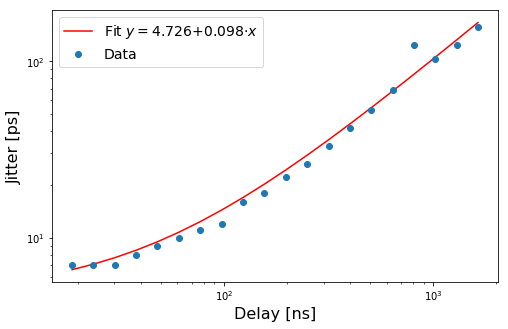

In [3]:
a, b = np.polyfit(logspace_measured_delay, logspace_measured_delay_sdev, deg=1)

jitter_log = 1e-3 * (a * logspace_measured_delay + b) 
jitter_1 = 1e-3 * (a * zoom_1_delay + b)
jitter_2 = 1e-3 * (a * zoom_2_delay + b)
jitter_3 = 1e-3 * (a * zoom_3_delay + b)

plt.figure(figsize=(8,5))
plt.loglog(logspace_measured_delay, 1e+3*jitter_log, 'r-', label=r'Fit $y= $'+str(round(b,3))+'$+$'+str(round(a,3))+'$\cdot x$')
plt.loglog(logspace_measured_delay, logspace_measured_delay_sdev,'o', label='Data')
plt.xlabel('Delay [ns]', fontsize='16')
plt.ylabel('Jitter [ps]', fontsize='16')
plt.legend(fontsize='14')

Fitting the data for full dynamic range of the delay line, calculating granularity and generating corresponding figures:

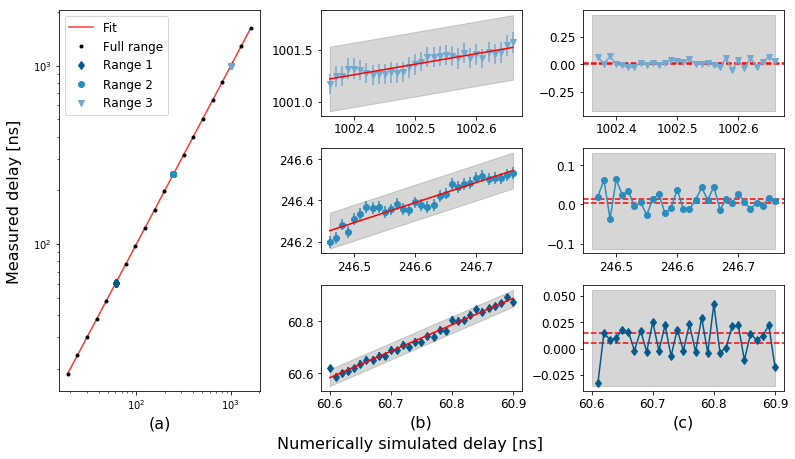

In [4]:
def linear_fit(x,y):    
    z = np.polyfit(x,y, 1)
    p = np.poly1d(z)
    return p(x)

granularity = 0.01
tolerance = 0.005
g_lim_up = granularity + tolerance
g_lim_down = granularity - tolerance
g_lim_mean = (g_lim_up + g_lim_down)/2
opacity = 0.16

fill_1_up =(g_lim_mean+3*np.sqrt(2)*np.mean(jitter_1))
fill_1_down = (g_lim_mean-3*np.sqrt(2)*np.mean(jitter_1))

fill_2_up = (g_lim_mean+3*np.sqrt(2)*np.mean(jitter_2))
fill_2_down = (g_lim_mean-3*np.sqrt(2)*np.mean(jitter_2))

fill_3_up = (g_lim_mean+3*np.sqrt(2)*np.mean(jitter_3))
fill_3_down = (g_lim_mean-3*np.sqrt(2)*np.mean(jitter_3))

fig = plt.figure(figsize=(13,7))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=1, rowspan=3)
#plt.loglog(logspace_numerical_delay, logspace_measured_delay, color='#f33f33', marker='None',linestyle='-', label='Fit')
plt.loglog(logspace_numerical_delay, linear_fit(logspace_numerical_delay, logspace_measured_delay), color='#f33f33', marker='None',linestyle='-', label='Fit')
plt.loglog(logspace_numerical_delay, logspace_measured_delay, color='#000000', marker='.', markersize=6,linestyle='None', label='Full range')
plt.loglog(zoom_1_numerical, zoom_1_delay, color='#045a8d', marker='d', linestyle='None', label='Range 1')
plt.loglog(zoom_2_numerical, zoom_2_delay, color='#2b8cbe', marker='o', linestyle='None', label='Range 2')
plt.loglog(zoom_3_numerical, zoom_3_delay, color='#74a9cf', marker='v', linestyle='None', label='Range 3')
plt.xlabel('(a)', fontsize=16)
plt.legend(fontsize=12)

plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels

ax2 = plt.subplot2grid((3,3), (0, 1))
plt.fill_between(zoom_3_numerical, linear_fit(zoom_3_numerical,zoom_3_delay)+3*np.mean(jitter_3), linear_fit(zoom_3_numerical,zoom_3_delay)-3*np.mean(jitter_3),
                 color='k', alpha=opacity)

plt.errorbar(zoom_3_numerical, zoom_3_delay, yerr=zoom_3_sdev, color='#74a9cf', marker='v', linestyle='None', label='Measured zoom 3')
plt.plot(zoom_3_numerical, linear_fit(zoom_3_numerical,zoom_3_delay), 'r-', zorder=3)
ax2.ticklabel_format(useOffset=False, style='plain')

ax3 = plt.subplot2grid((3,3), (1, 1))
plt.fill_between(zoom_2_numerical, linear_fit(zoom_2_numerical,zoom_2_delay)+3*np.mean(jitter_2), linear_fit(zoom_2_numerical,zoom_2_delay)-3*np.mean(jitter_2),
                 color='k', alpha=opacity)
plt.errorbar(zoom_2_numerical, zoom_2_delay, yerr=zoom_2_sdev, color='#2b8cbe', marker='o', linestyle='None', label='Measured zoom 2')
plt.plot(zoom_2_numerical, linear_fit(zoom_2_numerical,zoom_2_delay), 'r-', zorder=3)


ax4 = plt.subplot2grid((3,3), (2, 1))
plt.fill_between(zoom_1_numerical, linear_fit(zoom_1_numerical,zoom_1_delay)+3*np.mean(jitter_1), linear_fit(zoom_1_numerical,zoom_1_delay)-3*np.mean(jitter_1),
                 color='k', alpha=opacity)
plt.errorbar(zoom_1_numerical, zoom_1_delay, yerr=zoom_1_sdev, color='#045a8d', marker='d', linestyle='None', label='Measured zoom 1')
plt.plot(zoom_1_numerical, linear_fit(zoom_1_numerical,zoom_1_delay), 'r-', zorder=3)
plt.xlabel('(b)', fontsize=16)


ax5 = plt.subplot2grid((3,3), (0, 2))
plt.fill_between(zoom_3_numerical, fill_3_up, fill_3_down, color='k', alpha=opacity)
plt.axhline(y=g_lim_up, color='r', linestyle='--')
plt.axhline(y=g_lim_down, color='r', linestyle='--')
plt.plot(zoom_3_numerical[1:], np.diff(zoom_3_delay), color='#74a9cf', marker='v', linestyle='-', label='Measured zoom 3')
#plt.ylim(-0.4, 0.4)
ax5.ticklabel_format(useOffset=False, style='plain')


ax6 = plt.subplot2grid((3,3), (1, 2))
plt.fill_between(zoom_2_numerical, fill_2_up, fill_2_down, color='k', alpha=opacity)
plt.axhline(y=g_lim_up, color='r', linestyle='--')
plt.axhline(y=g_lim_down, color='r', linestyle='--')
plt.plot(zoom_2_numerical[1:], np.diff(zoom_2_delay), color='#2b8cbe', marker='o', linestyle='-', label='Measured zoom 2')
#plt.ylim(-0.12, 0.12)

ax7 = plt.subplot2grid((3,3), (2, 2))
plt.fill_between(zoom_1_numerical, fill_1_up, fill_1_down, color='k', alpha=opacity)
plt.axhline(y=g_lim_up, color='r', linestyle='--')
plt.axhline(y=g_lim_down, color='r', linestyle='--')
plt.plot(zoom_1_numerical[1:], np.diff(zoom_1_delay), color='#045a8d', marker='d', linestyle='-', label='Measured zoom 1')
#plt.ylim(-0.05, 0.05)
plt.xlabel('(c)', fontsize=16)

fig.text(0.5, 0.01, 'Numerically simulated delay [ns]', ha='center', fontsize='16')
fig.text(0.07, 0.5, 'Measured delay [ns]', va='center', rotation='vertical', fontsize='16')
plt.subplots_adjust(hspace=0.3, wspace=0.3)


plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels



Generating the figure for the dead time of the delay line:

Text(0, 0.5, 'Dead time [ns]')

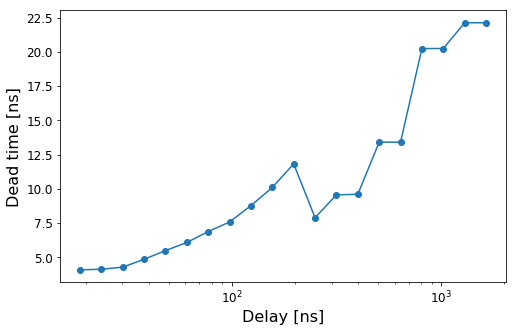

In [5]:
dead_time_MHz_v2=np.array((122.5, 121.2, 116.8, 103, 91.1, 82.2, 72.7, 66, 57, 
                  49.5, 42.3, 63.4, 52.3, 52.1, 37.3, 37.3, 24.7, 24.7, 22.6, 22.6))

dead_time_ns = 500/dead_time_MHz_v2

plt.figure(figsize=(8,5))
plt.semilogx(logspace_numerical_delay,dead_time_ns,'o-' )
plt.xlabel('Delay [ns]', fontsize='16')
plt.ylabel('Dead time [ns]', fontsize='16')

Uploading and preparing the data for thermal performace estimation of the delay line:

In [6]:
offset_values = pd.read_csv('temperature_offset_data.csv')
delay_values = pd.read_csv('temperature_delay_data.csv')
temp_senz_values = pd.read_csv('temperature_sensor_data.csv')
jitter_values = pd.read_csv('temperature_jitter_data.csv')


temp_per_stage, delay_per_stage, jitter_per_stage = np.zeros((24,7)), np.zeros((24,7)),np.zeros((24,7))


for j in range(7):
    for i in range(24):
        delay_per_stage[i,j] = delay_values.iloc[i,j] - offset_values.iloc[0,j]
        temp_per_stage[i,j] = temp_senz_values.iloc[i+1,j]
        jitter_per_stage[i,j] = jitter_values.iloc[i+1,j]


Generating the figure for jitter dependence on the temperature: 

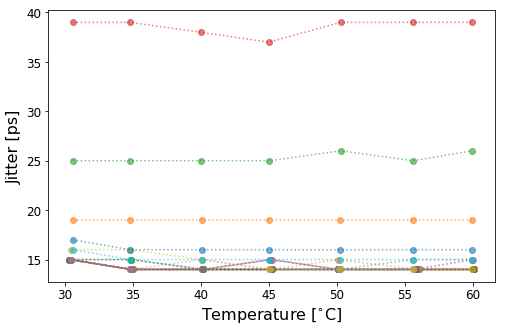

In [7]:
plt.figure(figsize=(8, 5))

for i in range(24):
    plt.plot(temp_per_stage[i], jitter_per_stage[i], 'o:',  alpha=0.6, label='stage '+str(i))
plt.xlabel(r'Temperature [$^{\circ}$C]',fontsize='16');
plt.ylabel('Jitter [ps]',fontsize='16');
plt.rc('xtick', labelsize=14)  
plt.rc('ytick', labelsize=14)  


Calculating $\beta$ - delay thermal increase coefficient and generating the figure: 

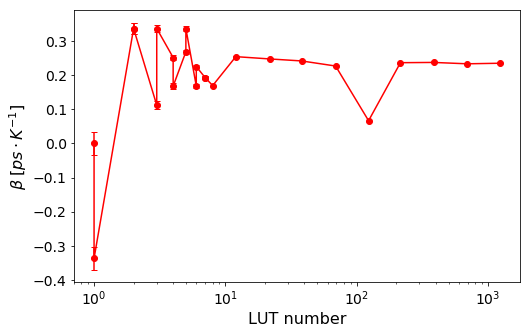

In [8]:
beta_max_min_N = np.zeros((len(delay_per_stage),1))
beta_err = np.zeros((len(beta_max_min_N)))
for i in range(len(delay_per_stage)):
    beta_max_min_N[i] = 1000*(delay_per_stage[i,6] - delay_per_stage[i,0]) / ((temp_per_stage[i,6] - temp_per_stage[i,0]) * luts_per_lvlbin[i])
    beta_err[i] = np.abs((jitter_per_stage[i,6] - jitter_per_stage[i,0]) / ((temp_per_stage[i,6] - temp_per_stage[i,0]) * luts_per_lvlbin[i]))
    
plt.figure(figsize=(8, 5))   
plt.xscale('log', nonposx='clip')
plt.errorbar(luts_per_lvlbin, beta_max_min_N, yerr=beta_err, marker='o', linestyle='-',color='r', capsize=3)
plt.xlabel('LUT number',fontsize='16')
plt.ylabel(r'$\beta \; [ps \cdot K^{-1}]$',fontsize='16')
plt.rc('xtick', labelsize=14)  
plt.rc('ytick', labelsize=14)  
